<a href="https://colab.research.google.com/github/Hritvik1211/college_5thsem/blob/master/Car93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Subtask:
Install necessary libraries and set up Kaggle API credentials.

In [67]:
# Install the kaggle library
!pip install kaggle

# Create the .kaggle directory in the home directory if it doesn't exist
# -p flag ensures that parent directories are created as needed and no error if the directory already exists
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the .kaggle directory
# Assuming kaggle.json was uploaded to the /content/ directory
!mv /content/kaggle.json ~/.kaggle/

# Set file permissions for kaggle.json to be read and written only by the owner
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle library installed and credentials setup attempted.")

mv: cannot stat '/content/kaggle.json': No such file or directory
Kaggle library installed and credentials setup attempted.


## Download and load data

### Subtask:
Download the dataset from Kaggle and load it into a pandas DataFrame.

In [68]:
import pandas as pd
import os
import zipfile

# Define dataset details
dataset_name = 'anand0427/cars93'
download_path = '/content/'
zip_file_name = 'cars93.zip'
csv_file_name = 'Cars93.csv'
csv_file_path = os.path.join(download_path, csv_file_name)

# Attempt to download the dataset using the Kaggle API
# The --unzip flag will automatically unzip the file after download
print(f"Attempting to download dataset: {dataset_name}")
# Using ! allows execution of shell commands
!kaggle datasets download {dataset_name} -p {download_path} --unzip --force

# Check if the expected CSV file exists after download and unzip
if os.path.exists(csv_file_path):
    print(f"Found extracted file: {csv_file_path}. Loading data into pandas DataFrame.")
    # Load the dataset into a pandas DataFrame
    try:
        df = pd.read_csv(csv_file_path)

        # Display initial information to verify loading
        print("\nSuccessfully loaded data. First 5 rows:")
        display(df.head())

        print("\nDataFrame Info:")
        display(df.info())

        print("\nMissing values per column:")
        display(df.isnull().sum())

        print("\nNumber of duplicate rows:")
        display(df.duplicated().sum())

    except Exception as e:
        print(f"An error occurred during data loading or initial checks: {e}")
else:
    print(f"Error: Expected CSV file '{csv_file_name}' not found at '{csv_file_path}' after download and unzip attempt.")
    print("Please ensure your Kaggle API is set up correctly and the dataset was downloaded successfully.")

Attempting to download dataset: anand0427/cars93
Dataset URL: https://www.kaggle.com/datasets/anand0427/cars93
License(s): unknown
  0% 0.00/4.93k [00:00<?, ?B/s]
100% 4.93k/4.93k [00:00<00:00, 12.7MB/s]
Found extracted file: /content/Cars93.csv. Loading data into pandas DataFrame.

Successfully loaded data. First 5 rows:


,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             59 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64 

None


Missing values per column:


,0
Unnamed: 0,0
Manufacturer,0
Model,0
Type,0
Min.Price,0
Price,0
Max.Price,0
MPG.city,0
MPG.highway,0
AirBags,34



Number of duplicate rows:


np.int64(0)

## Clean data

### Subtask:
Handle missing values in the dataset.

In [69]:
# Impute missing values
# 'AirBags' is categorical, so we'll use the mode for imputation.
# 'Rear.seat.room' and 'Luggage.room' are numerical, so we'll use the median for imputation.
df['AirBags'].fillna(df['AirBags'].mode()[0], inplace=True)
df['Rear.seat.room'].fillna(df['Rear.seat.room'].median(), inplace=True)
df['Luggage.room'].fillna(df['Luggage.room'].median(), inplace=True)

# Verify that there are no more missing values
print("Missing values after imputation:")
display(df.isnull().sum())

Missing values after imputation:


/tmp/ipython-input-790775167.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AirBags'].fillna(df['AirBags'].mode()[0], inplace=True)
/tmp/ipython-input-790775167.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,0
Unnamed: 0,0
Manufacturer,0
Model,0
Type,0
Min.Price,0
Price,0
Max.Price,0
MPG.city,0
MPG.highway,0
AirBags,0


## Perform descriptive statistics

### Subtask:
Calculate summary statistics for numerical columns and value counts for categorical columns.

In [70]:
# Calculate descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
display(df.describe())

# Calculate value counts for categorical columns
print("\nValue counts for categorical columns:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nValue Counts for {col}:")
        display(df[col].value_counts())

Descriptive statistics for numerical columns:


,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.822581,13.903226,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.956795,2.813263,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000



Value counts for categorical columns:

Value Counts for Manufacturer:


,count
Manufacturer,
Chevrolet,8
Ford,8
Dodge,6
Mazda,5
Pontiac,5
Oldsmobile,4
Hyundai,4
Buick,4
Nissan,4



Value Counts for Model:


,count
Model,
Integra,1
Legend,1
90,1
100,1
535i,1
...,...
Eurovan,1
Passat,1
Corrado,1



Value Counts for Type:


,count
Type,
Midsize,22
Small,21
Compact,16
Sporty,14
Large,11
Van,9



Value Counts for AirBags:


,count
AirBags,
Driver only,77
Driver & Passenger,16



Value Counts for DriveTrain:


,count
DriveTrain,
Front,67
Rear,16
4WD,10



Value Counts for Cylinders:


,count
Cylinders,
4,49
6,31
8,7
3,3
5,2
rotary,1



Value Counts for Man.trans.avail:


,count
Man.trans.avail,
Yes,61
No,32



Value Counts for Origin:


,count
Origin,
USA,48
non-USA,45



Value Counts for Make:


,count
Make,
Acura Integra,1
Acura Legend,1
Audi 90,1
Audi 100,1
BMW 535i,1
...,...
Volkswagen Eurovan,1
Volkswagen Passat,1
Volkswagen Corrado,1


## Visualize the data

### Subtask:
Visualize the distribution of key variables and the relationships between them, focusing on car pricing, fuel efficiency, and safety vs. performance.


Generating histograms for numerical columns...


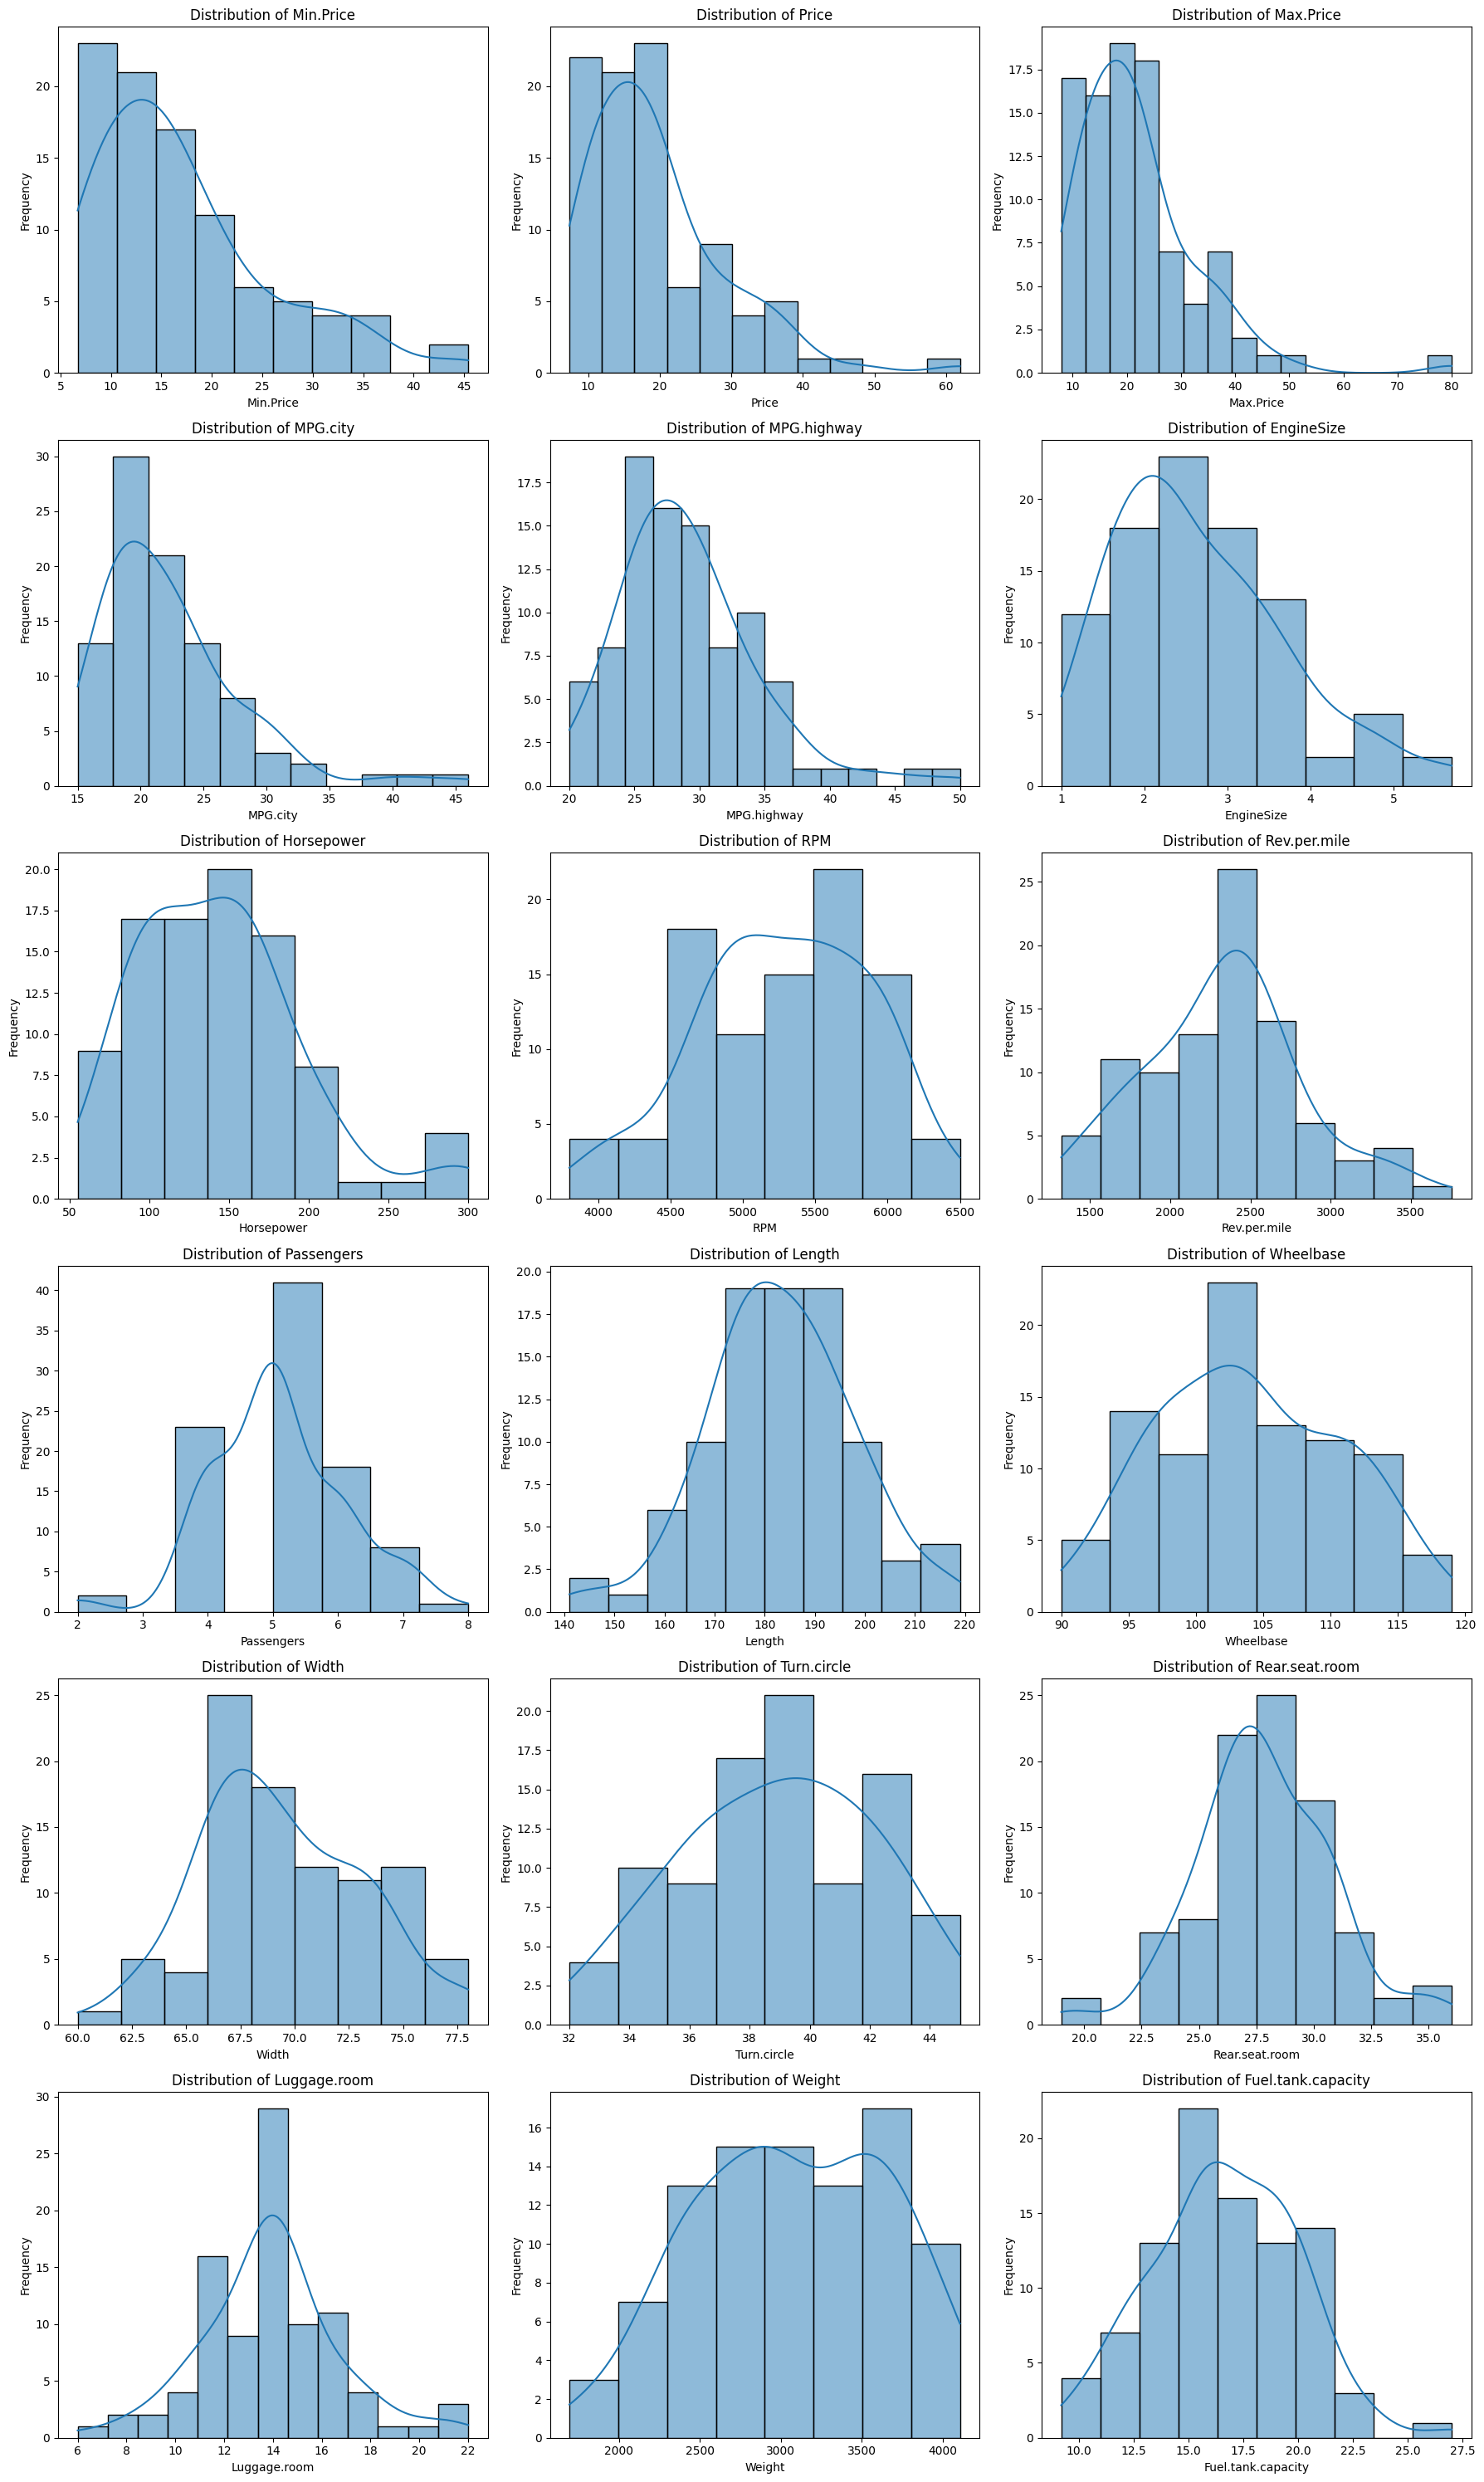

Histograms generated.

Generating box plots by car type...


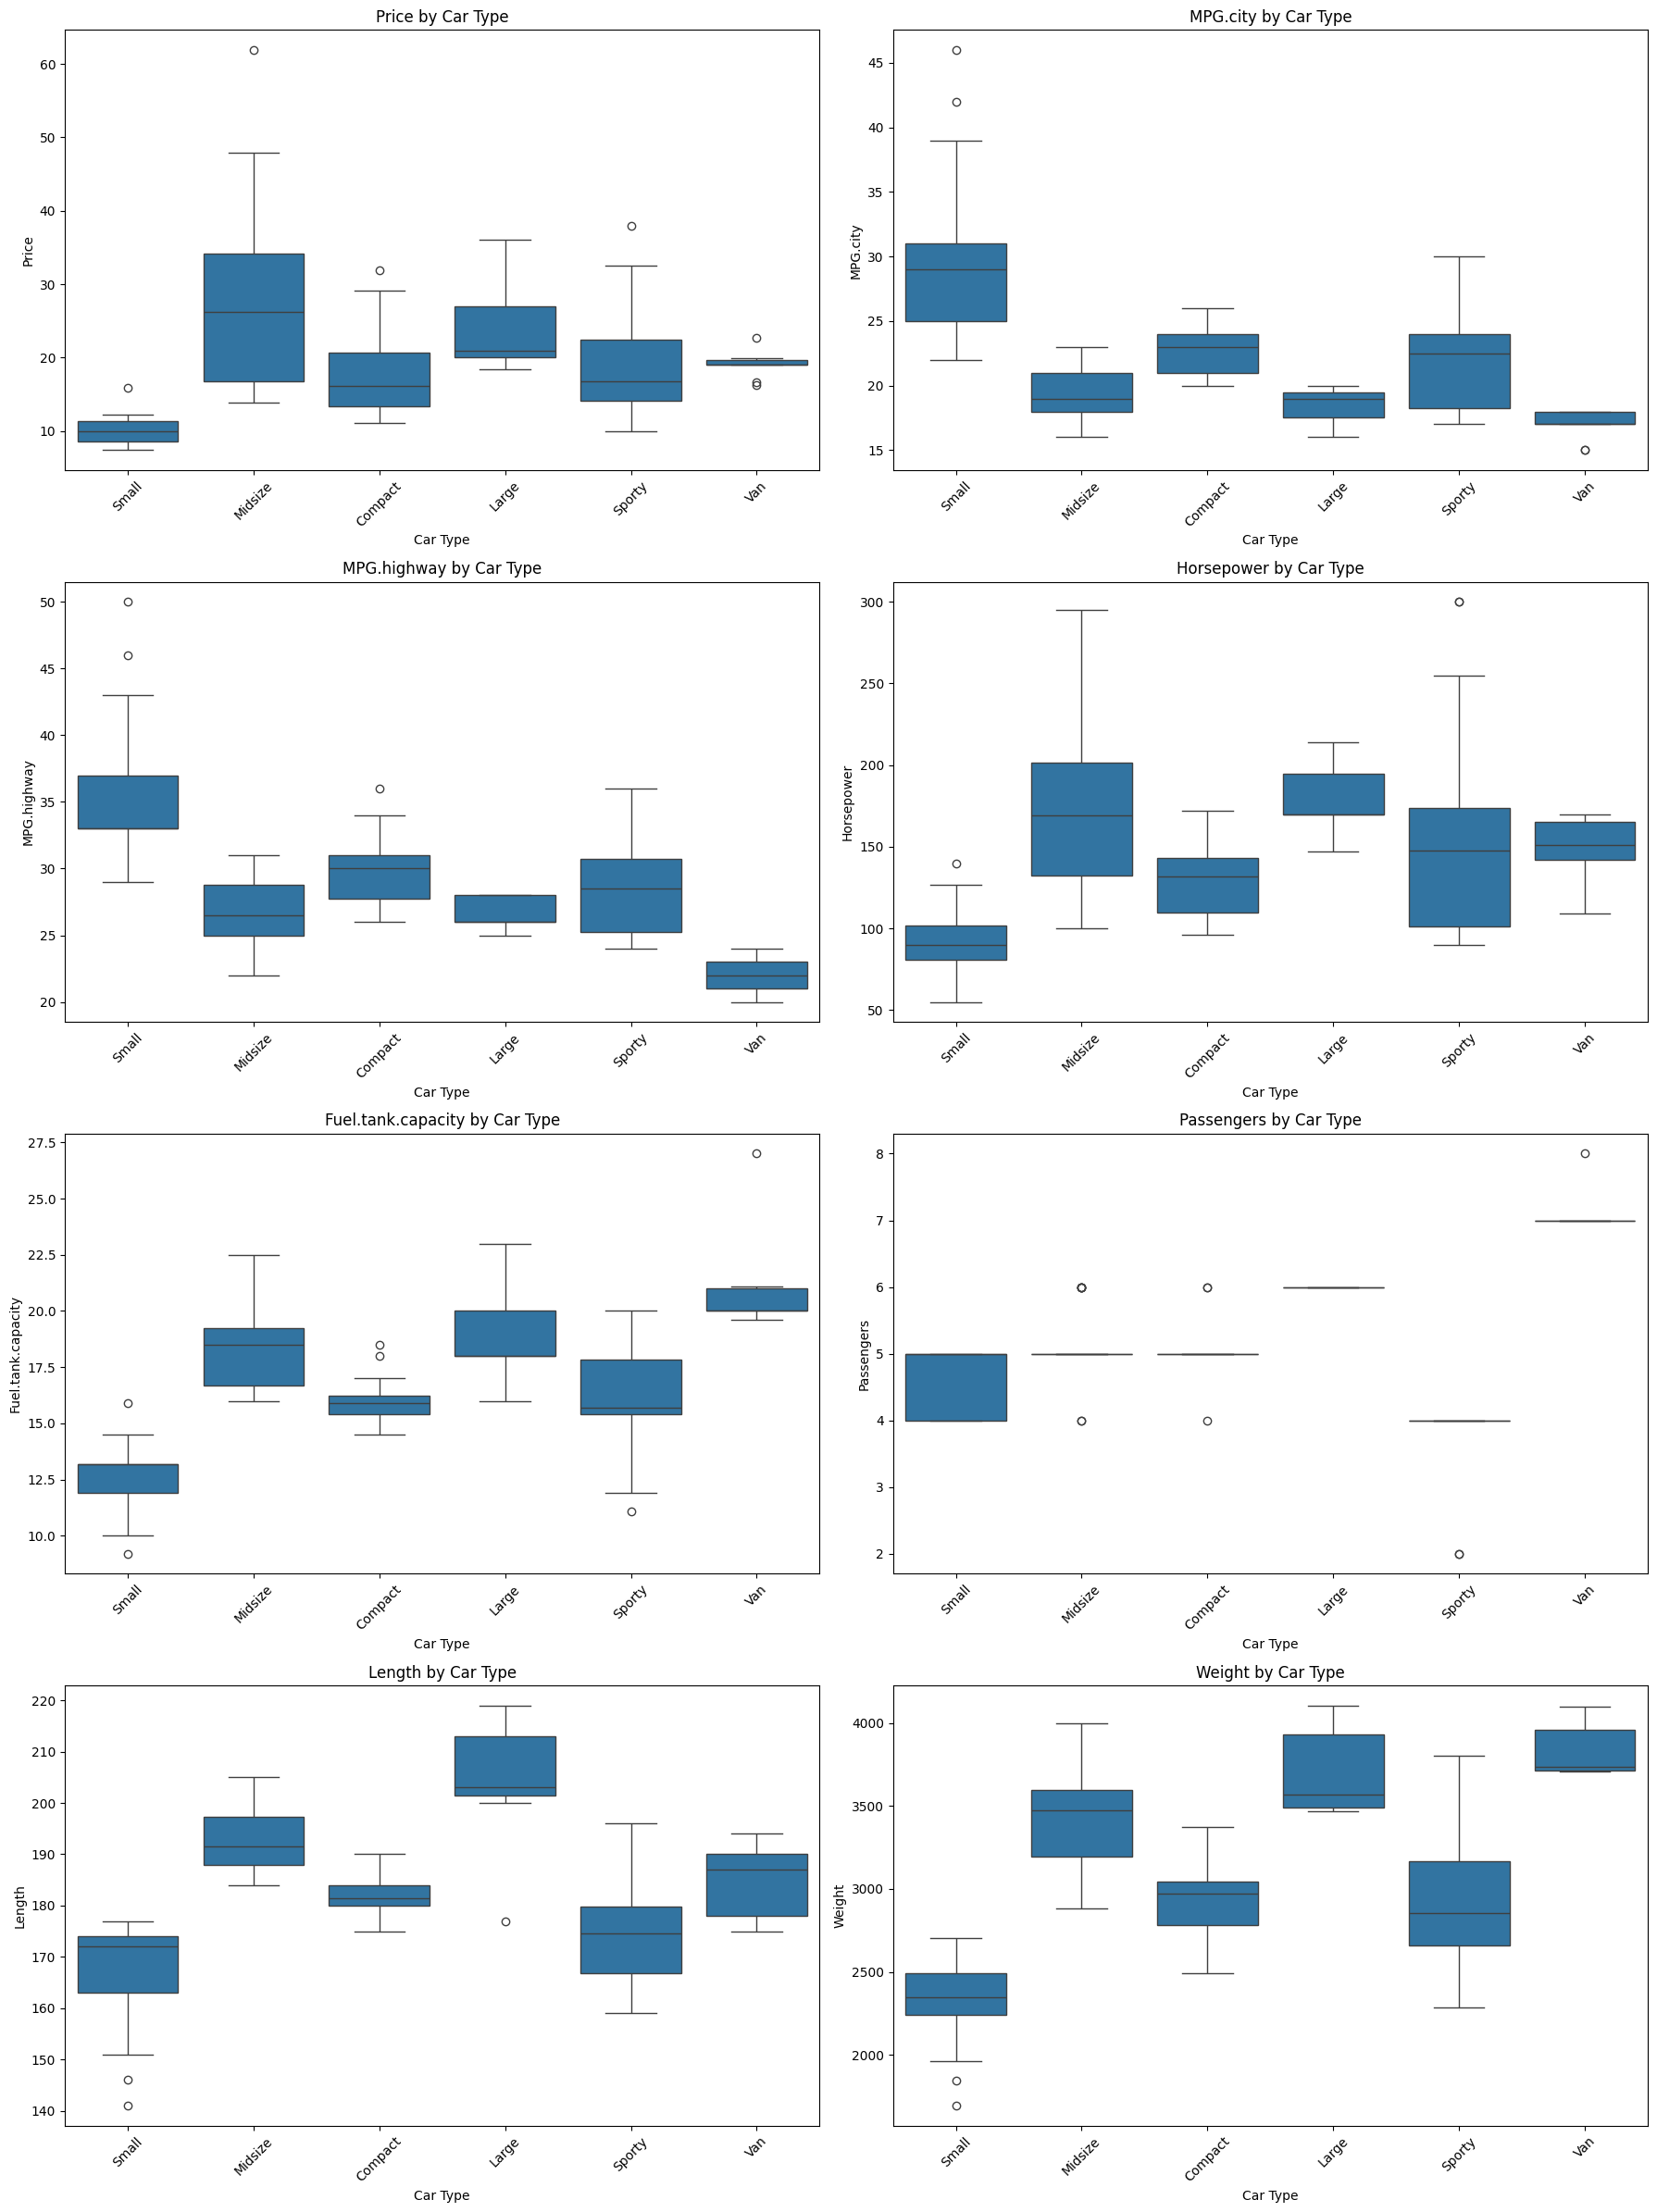

Box plots by car type generated.

Generating scatter plots...


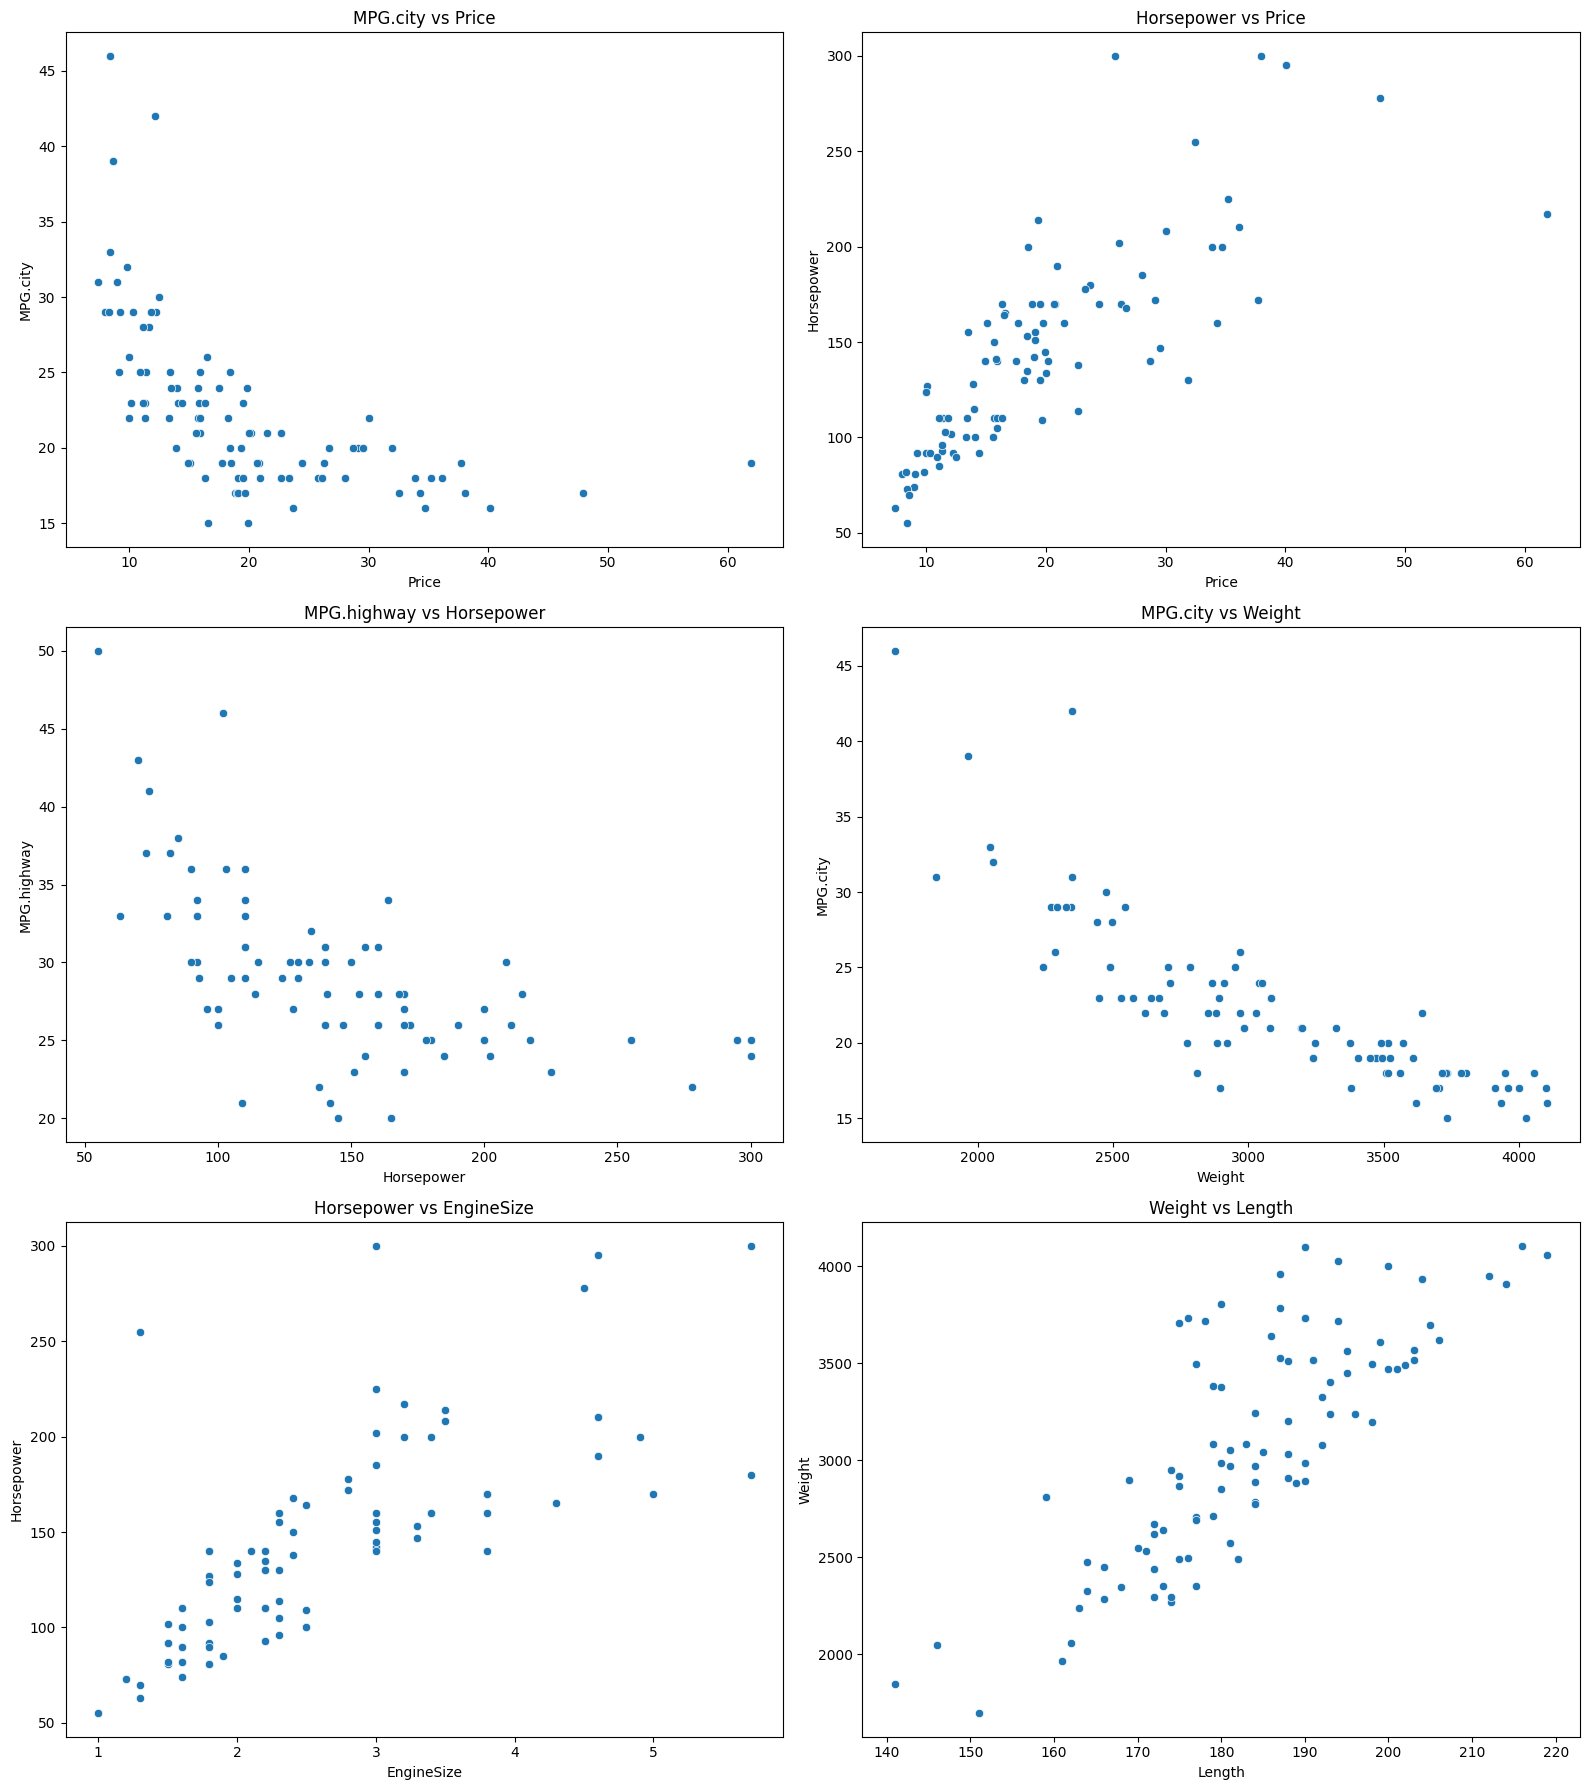

Scatter plots generated.

Generating AirBags distribution plot...


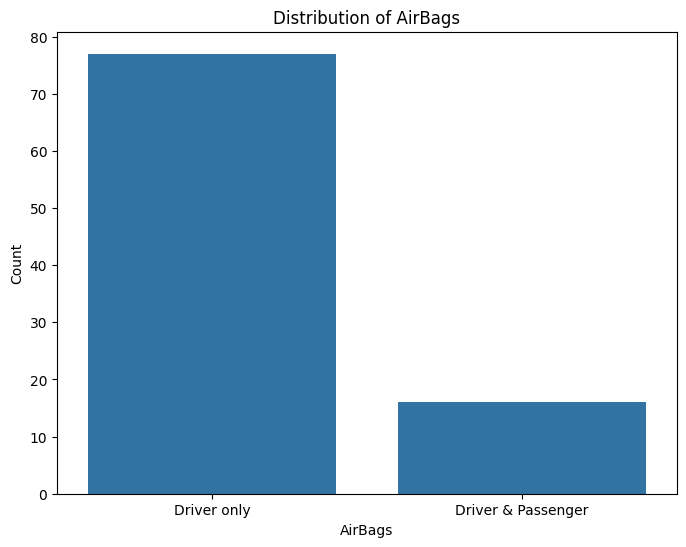

AirBags distribution plot generated.

Generating Price by AirBags box plot...


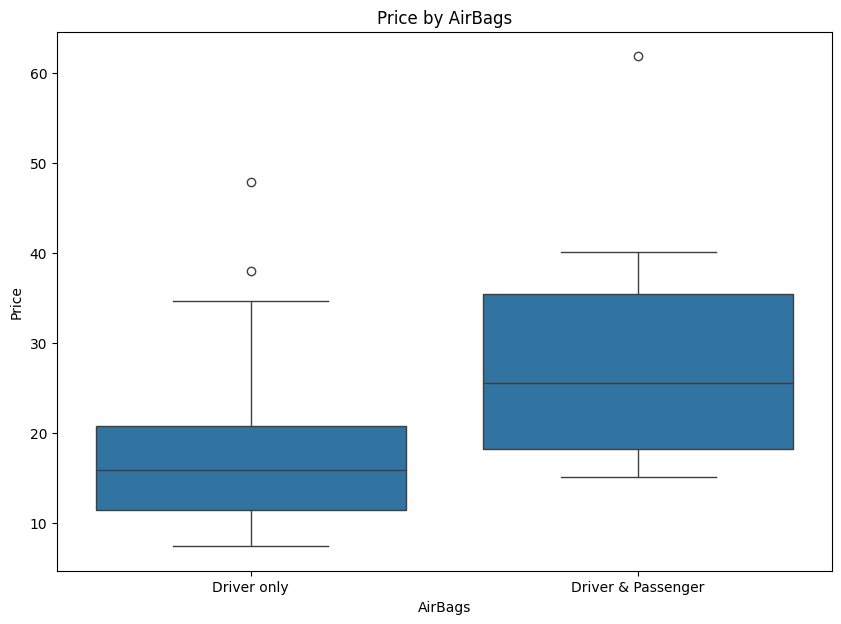

Price by AirBags box plot generated.


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for numerical columns
price_cols = ['Min.Price', 'Price', 'Max.Price']
fuel_cols = ['MPG.city', 'MPG.highway']
performance_cols = ['EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile']
other_numerical_cols = ['Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Fuel.tank.capacity']

# Combine all numerical columns for histograms
all_numerical_cols = price_cols + fuel_cols + performance_cols + other_numerical_cols

print("\nGenerating histograms for numerical columns...")
# Determine number of rows and columns for subplots
n_cols = 3
n_rows = (len(all_numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(all_numerical_cols):
    if col in df.columns:
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].set_title(f'Column not found: {col}')
        axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
print("Histograms generated.")


# 2. Box plots across different car types ('Type') for key numerical features
type_cols_for_boxplot = ['Price', 'MPG.city', 'MPG.highway', 'Horsepower', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Weight']

print("\nGenerating box plots by car type...")
# Determine number of rows and columns for subplots
n_cols_bp = 2
n_rows_bp = (len(type_cols_for_boxplot) + n_cols_bp - 1) // n_cols_bp

fig, axes = plt.subplots(nrows=n_rows_bp, ncols=n_cols_bp, figsize=(18, n_rows_bp * 6))
axes = axes.flatten()

if 'Type' in df.columns:
    for i, col in enumerate(type_cols_for_boxplot):
        if col in df.columns:
            sns.boxplot(data=df, x='Type', y=col, ax=axes[i])
            axes[i].set_title(f'{col} by Car Type')
            axes[i].set_xlabel('Car Type')
            axes[i].set_ylabel(col)
            axes[i].tick_params(axis='x', rotation=45)
        else:
             axes[i].set_title(f'Column not found: {col}')
             axes[i].axis('off')
else:
    print("'Type' column not found for box plots.")
    for ax in axes:
        ax.axis('off') # Turn off empty subplots

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()
print("Box plots by car type generated.")


# 3. Scatter plots to explore relationships between key variables
scatter_plots = [
    ('Price', 'MPG.city'),
    ('Price', 'Horsepower'),
    ('Horsepower', 'MPG.highway'),
    ('Weight', 'MPG.city'),
    ('EngineSize', 'Horsepower'),
    ('Length', 'Weight')
]

print("\nGenerating scatter plots...")
# Determine number of rows and columns for subplots
n_cols_sp = 2
n_rows_sp = (len(scatter_plots) + n_cols_sp - 1) // n_cols_sp

fig, axes = plt.subplots(nrows=n_rows_sp, ncols=n_cols_sp, figsize=(16, n_rows_sp * 6))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(scatter_plots):
     if x_col in df.columns and y_col in df.columns:
        sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[i])
        axes[i].set_title(f'{y_col} vs {x_col}')
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)
     else:
        axes[i].set_title(f'Columns not found: {x_col}, {y_col}')
        axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()
print("Scatter plots generated.")


# 4. Distribution of 'AirBags'
print("\nGenerating AirBags distribution plot...")
if 'AirBags' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='AirBags', order=df['AirBags'].value_counts().index) # Order by count
    plt.title('Distribution of AirBags')
    plt.xlabel('AirBags')
    plt.ylabel('Count')
    plt.show()
    print("AirBags distribution plot generated.")
else:
    print("'AirBags' column not found for distribution plot.")


# 5. Relationship between 'AirBags' and 'Price'
print("\nGenerating Price by AirBags box plot...")
if 'AirBags' in df.columns and 'Price' in df.columns:
    plt.figure(figsize=(10, 7))
    sns.boxplot(data=df, x='AirBags', y='Price', order=df.groupby('AirBags')['Price'].median().sort_values().index) # Order by median price
    plt.title('Price by AirBags')
    plt.xlabel('AirBags')
    plt.ylabel('Price')
    plt.show()
    print("Price by AirBags box plot generated.")
else:
     print("'AirBags' or 'Price' column not found for box plot.")

## Generate insights

### Subtask:
Analyze the descriptive statistics and visualizations to identify trends, patterns, and potential trade-offs related to car pricing, fuel efficiency, and safety vs. performance.

Based on the descriptive statistics and visualizations:

**1. Car Pricing (Min.Price, Price, Max.Price):**
- The price distribution (histograms) appears to be right-skewed, indicating that most cars are in the lower to mid-price range, with fewer expensive cars.
- The box plots by car type show that Midsize and Large cars generally have higher prices than Small, Compact, Sporty, and Van types.
- Scatter plots show a positive correlation between Price and Horsepower, meaning more expensive cars tend to have higher horsepower. There is a negative correlation between Price and MPG.city, suggesting more expensive cars generally have lower city fuel efficiency.

**2. Fuel Efficiency (MPG.city, MPG.highway):**
- The distribution of MPG values (histograms) appears somewhat normally distributed, though perhaps slightly skewed towards lower MPG.
- Box plots by car type show that Small and Compact cars tend to have better fuel efficiency (higher MPG.city and MPG.highway) compared to larger car types.
- Scatter plots confirm the negative relationship between Price and MPG.city. There is also a negative relationship between Weight and MPG.city, indicating heavier cars tend to have lower city fuel efficiency. Horsepower and MPG.highway show a slight negative correlation, suggesting higher horsepower might slightly reduce highway fuel efficiency.

**3. Safety vs. Performance (AirBags, Horsepower, EngineSize, Weight):**
- The distribution of AirBags shows that 'Driver only' airbags are the most common, followed by 'None', and then 'Driver & Passenger'.
- The box plot of Price by AirBags indicates that cars with 'Driver & Passenger' airbags are generally more expensive than those with 'Driver only' or 'None'. This suggests a potential trade-off where increased safety features (dual airbags) are associated with higher prices.
- The scatter plot of Horsepower vs. Weight shows a positive correlation, meaning heavier cars tend to have higher horsepower. This suggests a trade-off where achieving higher performance often requires a larger, heavier vehicle.
- Generally, there's a trade-off between performance (higher horsepower, engine size) and fuel efficiency (lower MPG), as seen in the scatter plots and box plots by type. More powerful cars tend to be less fuel-efficient and heavier.

**Synthesized Insights:**

- **Pricing Trends:** Car prices are right-skewed, with most vehicles in the lower to mid-range. Larger and more powerful cars (higher Horsepower) tend to be more expensive.
- **Fuel Efficiency Patterns:** Smaller and lighter cars, as well as those with lower horsepower, generally offer better fuel efficiency (higher MPG). There is a clear trade-off between price, size/weight, and fuel efficiency.
- **Safety vs. Performance Trade-offs:** Cars equipped with dual airbags ('Driver & Passenger') are typically more expensive, indicating a positive relationship between this safety feature and price. Higher performance (Horsepower) is positively correlated with weight, suggesting that more powerful cars are heavier, which in turn negatively impacts fuel efficiency.
- **Car Type Differences:** Different car types ('Small', 'Compact', 'Midsize', etc.) exhibit distinct patterns in terms of price, fuel efficiency, and horsepower, reflecting their intended market segments and design characteristics.
- **Overall Trade-offs:** The analysis highlights common automotive trade-offs: higher price and performance often come at the cost of lower fuel efficiency, and enhanced safety features like dual airbags are associated with higher prices.